### Summarizing data with PCA

This activity is meant to explore the results of applying PCA to a dataset.  Below, a dataset from a credit card company is loaded and displayed.  This dataset contains customer data pertaining to demographic and payment information as well as basic demographics.  The final column `default payment next month` is what we want to create profiles for.  

You are to use PCA and reduce the dimensionality of the data to 2 and 3 dimensions.  Then, draw scatterplots of the resulting data and color them by `default`.  Does it seem that 2 or 3 principal components will seperate the data into clear groups?  Why or why not?  You should post your visualizations and argument for whether the components offer more succinct data representations on the discussion board for this activity.  (Note: In this assignment you should use the sklearn version of `PCA`.)

In [2]:
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
default = pd.read_csv('data/credit.csv', index_col=0)

In [4]:
default.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   30000 no

In [5]:
default.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
Mu = default.mean()
Sigma = default.std()

default_norm = (default - Mu)/Sigma
default_norm.describe()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,...,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04
mean,-9.758120e-17,2.842171e-16,2.273737e-17,-1.193712e-16,-1.847411e-16,3.789561e-17,2.392161e-17,-7.579123e-18,8.715991e-17,2.368476e-17,...,5.684342e-17,-2.084259e-17,1.326346e-17,-9.592327e-18,1.989520e-17,2.652693e-17,2.155313e-17,-1.894781e-17,-1.089499e-17,-1.515825e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.213774e+00,-1.234302e+00,-2.344704e+00,-2.973098e+00,-1.571453e+00,-1.764813e+00,-1.558850e+00,-1.532166e+00,-1.521918e+00,-1.530021e+00,...,-3.314993e+00,-2.000840e+00,-6.355141e+00,-3.419359e-01,-2.569852e-01,-2.967963e-01,-3.080574e-01,-3.141309e-01,-2.933772e-01,-5.329327e-01
25%,-9.054832e-01,-1.234302e+00,-1.079439e+00,-1.057277e+00,-8.120610e-01,-8.749766e-01,-7.235579e-01,-6.966518e-01,-6.665876e-01,-6.475540e-01,...,-6.363187e-01,-6.340494e-01,-6.316233e-01,-2.815614e-01,-2.208321e-01,-2.746460e-01,-2.891632e-01,-2.976042e-01,-2.867536e-01,-5.329327e-01
50%,-2.118290e-01,8.101472e-01,1.858252e-01,8.585430e-01,-1.611538e-01,1.486028e-02,1.117342e-01,1.388625e-01,1.887429e-01,2.349126e-01,...,-3.763388e-01,-3.652622e-01,-3.660664e-01,-2.151494e-01,-1.697923e-01,-1.945640e-01,-2.123096e-01,-2.159525e-01,-2.090007e-01,-5.329327e-01
75%,5.588978e-01,8.101472e-01,1.858252e-01,8.585430e-01,5.982379e-01,1.486028e-02,1.117342e-01,1.388625e-01,1.887429e-01,2.349126e-01,...,1.747637e-01,1.624928e-01,1.733968e-01,-3.970110e-02,-3.997954e-02,-4.093162e-02,-5.188424e-02,-5.026000e-02,-6.837322e-02,-5.329327e-01
max,6.416421e+00,8.101472e-01,5.246883e+00,2.774363e+00,4.720650e+00,7.133555e+00,6.794071e+00,6.822977e+00,7.031387e+00,7.294645e+00,...,1.318647e+01,1.458719e+01,1.549502e+01,5.239834e+01,7.284177e+01,5.059444e+01,3.933152e+01,2.760317e+01,2.944461e+01,1.876347e+00


In [7]:
from scipy.linalg import svd
U, s, vt = svd(default_norm, full_matrices = False)
Sigma = np.diag(s)
V = vt.T

r = 2
Ur = U[:,:r]
Sigmar = Sigma [:r,:r]
default_rr = pd.DataFrame(Ur @ Sigmar)

<Axes: xlabel='0', ylabel='1'>

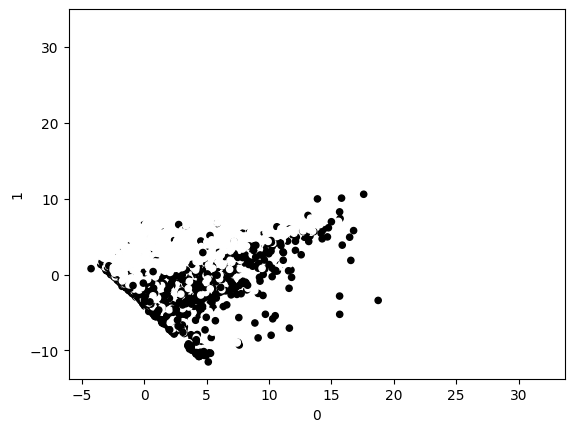

In [8]:
default_rr.plot(kind = 'scatter', x= 0, y=1, color = default['default.payment.next.month'])


In [9]:
r = 3
Ur = U[:,:r]
Sigmar = Sigma [:r,:r]
default_rr = pd.DataFrame(Ur @ Sigmar)

In [10]:
px.scatter_3d(data_frame=default_rr, x = 0, y = 1, z = 2, color = default['default.payment.next.month'])

##### Plotting in 3D

Below, example plots are made with both `matplotlib` and with `plotly` to demonstrate how to construct three dimensional plots.  

`matplotlib`

In `matplotlib` an `axes` object is created where the projection is specified as '3d'.  Then, the `axes` are use to plot a 3D object on.  Below, a scatter plot is built, but there are many 3D objects that can be created in addition to points.  For more information see the documentation on 3D plotting [here](https://matplotlib.org/stable/api/toolkits/mplot3d.html?highlight=3d).


`plotly`

Use the `scatter_3d` function directly.

KeyError: 'default payment next month'

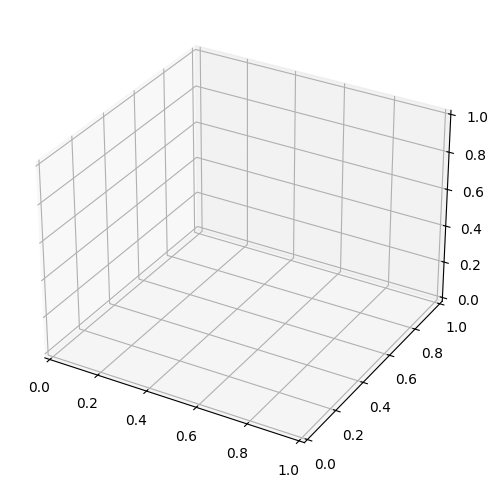

In [11]:
plt.figure(figsize = (6,6))
ax = plt.axes(projection = '3d')
ax.scatter3D(default['AGE'], default['BILL_AMT1'], default['BILL_AMT2'], c = default['default payment next month'], alpha = 0.4)
ax.set_xlabel('AGE', labelpad = 20)
ax.set_ylabel('Bill 1 Amount', labelpad = 20)
ax.set_zlabel('Bill 2 Amount', labelpad = 20)
ax.view_init(10, 60)
plt.title('Age and Bill Amount Colored by Default')
plt.tight_layout();

In [ ]:
px.scatter_3d(data_frame=default, x = 'AGE', y = 'BILL_AMT1', z = 'BILL_AMT2')